In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def IrisLocalization(image,filename):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_blurred = cv2.medianBlur(img_gray, 7)

    x_in = 0
    y_in = 0
    r_in = 0
    x_out = 0
    y_out = 0
    r_out = 0
    
    inner_circles = cv2.HoughCircles(
        img_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=30, param1=100, param2=30, minRadius=20, maxRadius=100)
    x_in = int(inner_circles[0][0][0])
    y_in = int(inner_circles[0][0][1])
    r_in = int(inner_circles[0][0][2])
        
    cv2.circle(image, (x_in, y_in), r_in, (255, 0, 0),3)
    cv2.circle(image, (x_in, y_in), 1, (0, 255, 0),3)
    cv2.imshow("image",image)

    outer_circles = cv2.HoughCircles(
        img_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=30, param1=40, param2=23, minRadius=int(1.8*r_in), maxRadius=int(3.3*r_in))
    distances = []
    for i in range(len(outer_circles[0])):
        distances.append(math.dist([x_in,y_in],[outer_circles[0][i][0],outer_circles[0][i][1]]))
    index = distances.index(min(distances))
    x_out = int(outer_circles[0][index][0])
    y_out = int(outer_circles[0][index][1])
    r_out = int(outer_circles[0][index][2])

    cv2.circle(image, (x_out, y_out), r_out, (255, 0, 0),3)
    cv2.circle(image, (x_out, y_out), 1, (0, 255, 0),3)
    cv2.imshow("image",image)
    plt.subplot(1, 1, 1)
    plt.imshow(image)
    if(filename!=None):
        plt.savefig("./Segmented figures/"+filename+".png")


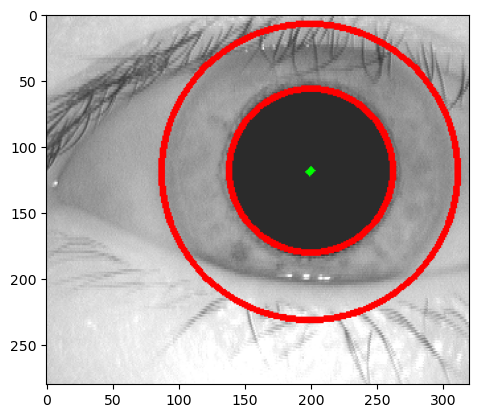

In [3]:
image = cv2.imread('CASIA Iris Image Database (version 1.0)/062/1/062_1_3.bmp')
IrisLocalization(image,None)

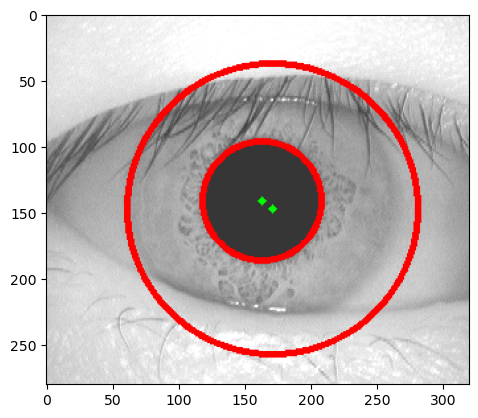

In [4]:
for i in range(1,109):
    count = str(i).rjust(3,"0")
    path = 'CASIA Iris Image Database (version 1.0)/'+count+'/1'
    for j in range(1,4):
        image_file = os.path.join(path, count+'_1_'+str(j)+'.bmp')
        image = cv2.imread(image_file)
        IrisLocalization(image,count+'_1_'+str(j))